In [2]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from patsy import dmatrices
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [3]:
heart=pd.read_csv("heart.csv")
print("\nThe first five rows are as below :")
heart.head()


The first five rows are as below :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Column data information : \n")
heart.info()

Column data information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print("The shape of dataset is:",heart.shape)

The shape of dataset is: (303, 14)


#### 4) Data cleaning

In [6]:
print("The number of missing values in the data columnwise: ")
heart.isnull().sum()

The number of missing values in the data columnwise: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Renaming the columns
heart=heart.rename(columns={'age':'Age','sex':'Sex_M','cp':'Chest_pain','trestbps':'Resting_BP','chol':'Cholesterol','fbs':'Fasting_blood_sugar','restecg':'Resting_ECG','thalach':'Max_Heart_Rate','exang':'Exercise_Induced_Angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Vessels_coloured_flouroscopy','thal':'Thalassemia','target':'Target'})
heart.head()

,Age,Sex_M,Chest_pain,Resting_BP,Cholesterol,Fasting_blood_sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_coloured_flouroscopy,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Since Thalassemia column had some 0 values which did not mean anything, so we are removing them from our dataset
heart['Thalassemia'].replace(0,np.nan,inplace=True)

In [9]:
heart.dropna(subset=['Thalassemia'],inplace=True)
heart.shape

(301, 14)

In [10]:
# Renaming the values by describing them for all categorical variables
heart_=heart.copy()
heart_.loc[heart_.Chest_pain == 0,'Chest_pain'] = "Typical angina"
heart_.loc[heart_.Chest_pain == 1,'Chest_pain'] = "Atypical angina"
heart_.loc[heart_.Chest_pain == 2,'Chest_pain'] = "Non-anginal pain"
heart_.loc[heart_.Chest_pain == 3,'Chest_pain'] = "Asymptomatic"
heart_.loc[heart_.Exercise_Induced_Angina == 0,'Exercise_Induced_Angina'] = "No"
heart_.loc[heart_.Exercise_Induced_Angina == 1,'Exercise_Induced_Angina'] = "Yes"
heart_.loc[heart_.Sex_M == 0,'Sex_M'] = "Female"
heart_.loc[heart_.Sex_M == 1,'Sex_M'] = "Male"
heart_.loc[heart_.Fasting_blood_sugar == 0,'Fasting_blood_sugar'] = "No"
heart_.loc[heart_.Fasting_blood_sugar == 1,'Fasting_blood_sugar'] = "Yes"
heart_.loc[heart_.Resting_ECG == 0,'Resting_ECG'] = "Normal"
heart_.loc[heart_.Resting_ECG == 1,'Resting_ECG'] = "ST Abnormality"
heart_.loc[heart_.Resting_ECG == 2,'Resting_ECG'] = "Left VH"
heart_.loc[heart_.Exercise_Induced_Angina == 0,'Exercise_Induced_Angina'] = "No angina"
heart_.loc[heart_.Exercise_Induced_Angina == 1,'Exercise_Induced_Angina'] = "angina"
heart_.loc[heart_.ST_slope == 0,'ST_slope'] = "Absent"
heart_.loc[heart_.ST_slope == 1,'ST_slope'] = "Upsloping"
heart_.loc[heart_.ST_slope == 2,'ST_slope'] = "Downsloping"
heart_.head()

,Age,Sex_M,Chest_pain,Resting_BP,Cholesterol,Fasting_blood_sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_coloured_flouroscopy,Thalassemia,Target
0,63,Male,Asymptomatic,145,233,Yes,Normal,150,No,2.3,Absent,0,1.0,1
1,37,Male,Non-anginal pain,130,250,No,ST Abnormality,187,No,3.5,Absent,0,2.0,1
2,41,Female,Atypical angina,130,204,No,Normal,172,No,1.4,Downsloping,0,2.0,1
3,56,Male,Atypical angina,120,236,No,ST Abnormality,178,No,0.8,Downsloping,0,2.0,1
4,57,Female,Typical angina,120,354,No,ST Abnormality,163,Yes,0.6,Downsloping,0,2.0,1


In [11]:
heart.describe()


,Age,Sex_M,Chest_pain,Resting_BP,Cholesterol,Fasting_blood_sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_coloured_flouroscopy,Thalassemia,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.966777,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,1.398671,0.734219,2.328904,0.544850
std,9.110950,0.465534,1.032259,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.584347,0.498814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#Functions
def reapplycode(x):#function to display the average in percentage
    return x*100

#### 5) Exploratory data analysis

###### 5.1) Univariate analysis 

###### Target (Response variable)

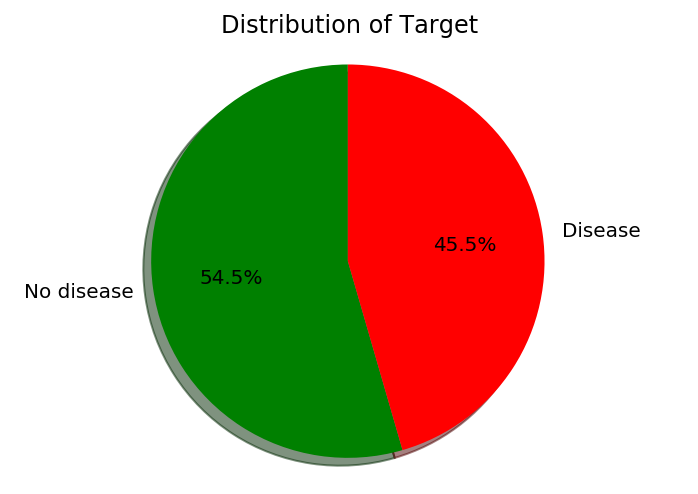

,Number of people,Percentage of disease
No Disease,137,54.49%
Have Disease,164,45.51%


In [13]:
#Graph of number of people with heart disease
labels = "No disease", "Disease"
colors = ['Green','Red']
explode = (0, 0.0)
fig1, ax1 = plt.subplots()
ax1.pie(heart['Target'].value_counts(), colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True,startangle=90)
ax1.axis("equal") 
plt.title("Distribution of Target")
plt.show()

#Table to display the average percent of people with heart disease and the total number of people in that category
count = heart.groupby('Target').Target.count()
perc_c = pd.DataFrame(count)# creating a dataframe to make it look presentable
heartdis = len(heart[heart['Target'] == 1])
noheartdis = len(heart[heart['Target'] == 0])
f_heartdis = (heartdis/(heartdis+noheartdis))
f_noheartdis = (noheartdis/(heartdis+noheartdis))
perc_c['Percentage of disease'] = [f_heartdis,f_noheartdis]
perc_c = perc_c.rename(columns = {'Target':'Number of people'}) # Renaming the column names
perc_c['Percentage of disease'] = perc_c['Percentage of disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Percentage of disease'] = perc_c['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Percentage of disease'] = perc_c['Percentage of disease'].astype(str)+'%'
perc_c.index = ['No Disease','Have Disease']
perc_c

### 5.2) Bivariate analysis

###### In this section , we shall perform bivariate analysis for response variable -Target and each of the categorical variables- sex, chest pain, fasting blood sugar, resting ECG,excercise induced angina, slope, number of major vessels, thalassemia (8 variables)

###### 5.2.1.1) Chest pain vs Target

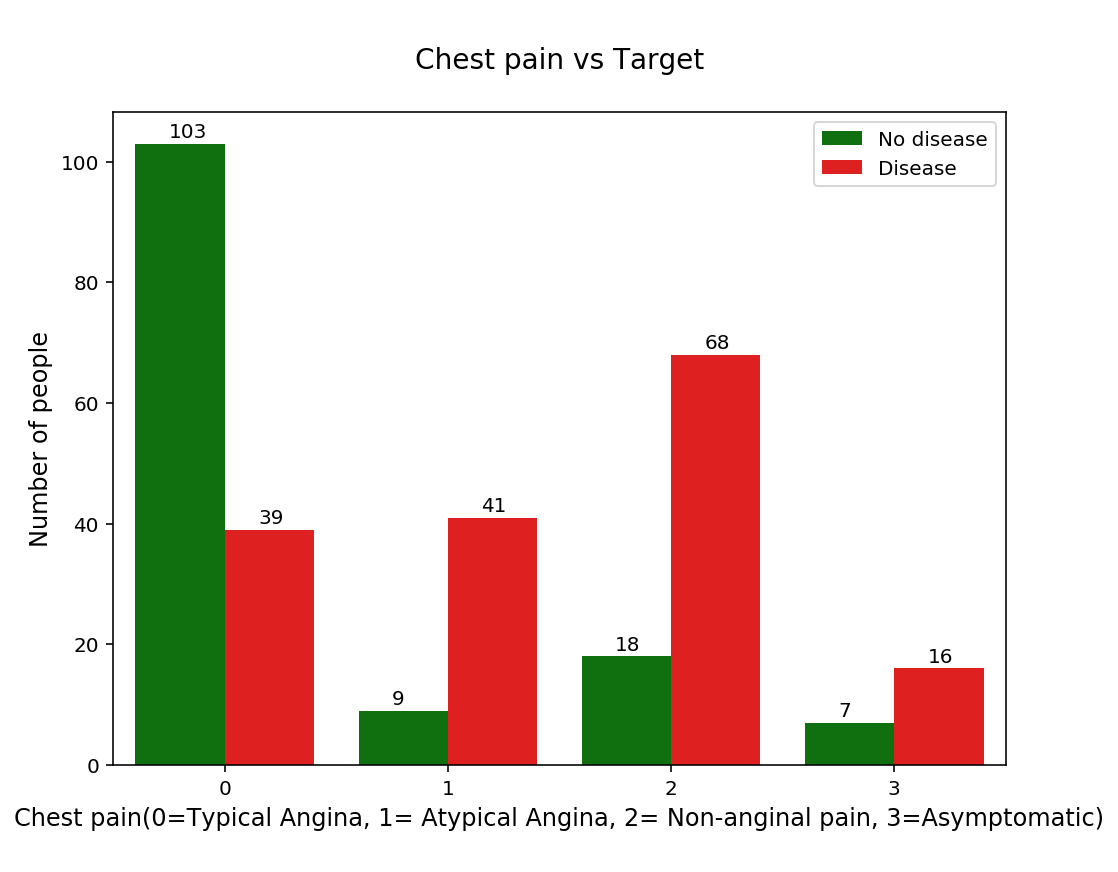

,Average_disease,Count of people
Typical Angina,27.46%,142
Atypical Angina,82.0%,50
Non-anginal pain,79.07%,86
Asymptomatic,69.57%,23


In [14]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Chest_pain", hue="Target", data=heart, palette=['Green','Red'])
plt.legend(['No disease','Disease'])
plt.xlabel('Chest pain(0=Typical Angina, 1= Atypical Angina, 2= Non-anginal pain, 3=Asymptomatic)\n',fontsize=12)
plt.ylabel('Number of people',fontsize=12)
plt.title('\nChest pain vs Target\n',fontsize=14)

# For loop to display the count on top of bars in the countplot
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc = heart.groupby('Chest_pain').Target.mean()
perc_c = pd.DataFrame(perc) # creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Chest_pain').Target.count()
perc_c = perc_c.rename(columns={'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) # Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals = 2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str)+'%'
perc_c.index = ['Typical Angina','Atypical Angina','Non-anginal pain','Asymptomatic']
perc_c

###### 5.2.1.2) Sex vs Target

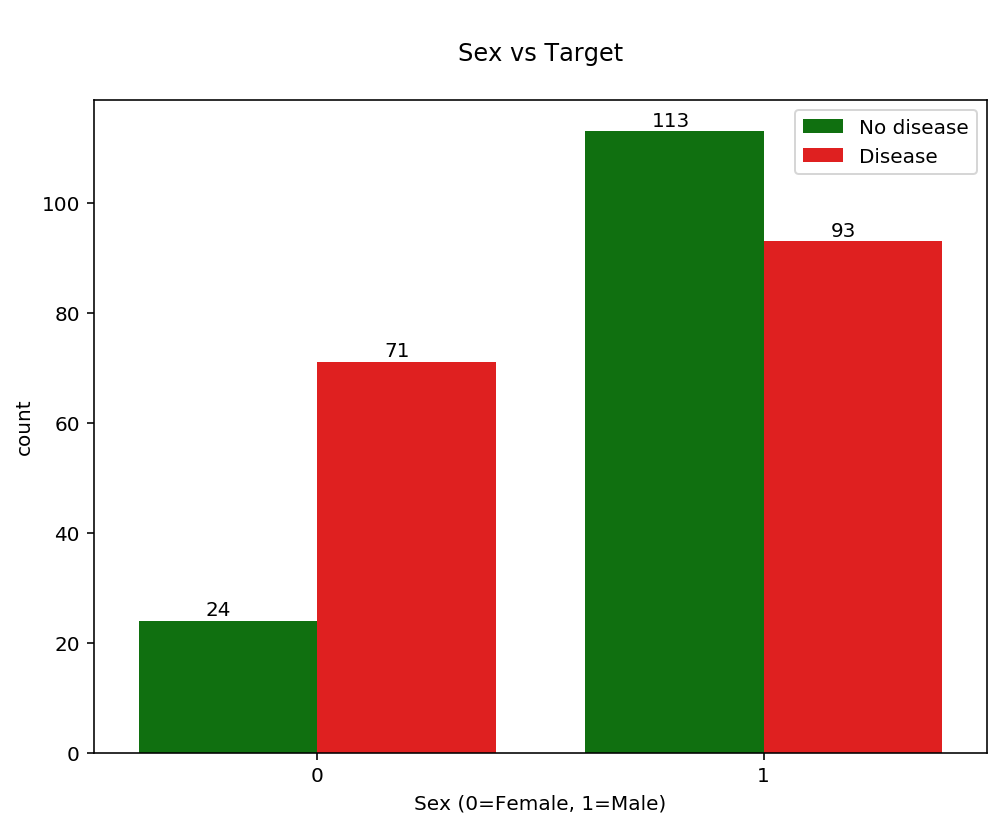

,Average_disease,Count of people
Females,74.74%,95
Males,45.15%,206


In [15]:
tgt = plt.subplots(figsize = (8, 6))
tgt = sns.countplot(x = "Sex_M", hue = "Target", data=heart, palette = ['Green','Red'])
plt.xlabel('Sex (0=Female, 1=Male)')
plt.legend(['No disease','Disease'])
plt.title('\nSex vs Target\n')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()), (p.get_x() + 0.15,p.get_height() + 1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc = heart.groupby('Sex_M').Target.mean()
perc_c = pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people'] = heart.groupby('Sex_M').Target.count()
perc_c = perc_c.rename(columns = {'Target':'Average_disease'})
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) # Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals = 2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str) + '%'
perc_c.index = ['Females','Males']
perc_c

###### 5.2.1.3) Fasting_blood_sugar vs Target

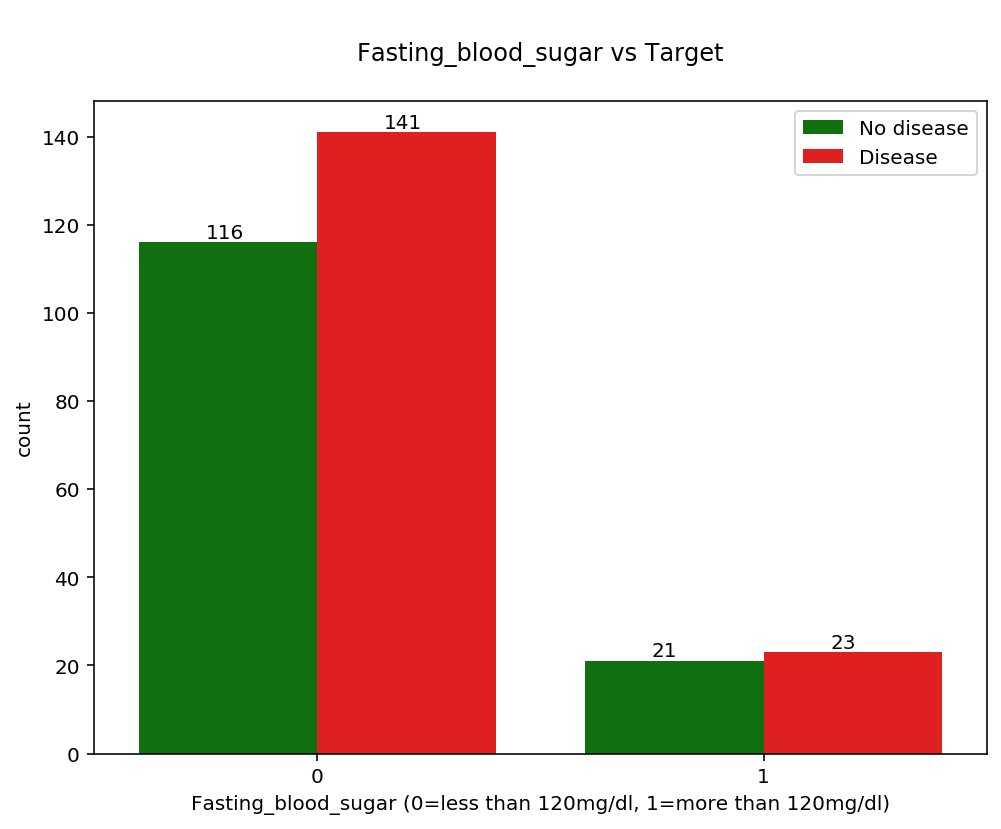

,Average_disease,Count of people
Less than 120mg/dl,54.86%,257
More than 120mg/dl,52.27%,44


In [16]:
tgt = plt.subplots(figsize = (8, 6))
tgt = sns.countplot(x = "Fasting_blood_sugar", hue = "Target", data = heart, palette = ['Green','Red'])
plt.xlabel('Fasting_blood_sugar (0=less than 120mg/dl, 1=more than 120mg/dl)')
plt.legend(['No disease','Disease'])
plt.title('\nFasting_blood_sugar vs Target\n')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc = heart.groupby('Fasting_blood_sugar').Target.mean()
perc_c = pd.DataFrame(perc) # creating a dataframe to make it look presentable
perc_c['Count of people'] = heart.groupby('Fasting_blood_sugar').Target.count()
perc_c = perc_c.rename(columns = {'Target':'Average_disease'})
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) #Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals = 2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str) + '%'
perc_c.index = ['Less than 120mg/dl','More than 120mg/dl']
perc_c

###### 5.2.1.4) Resting_ECG vs Target

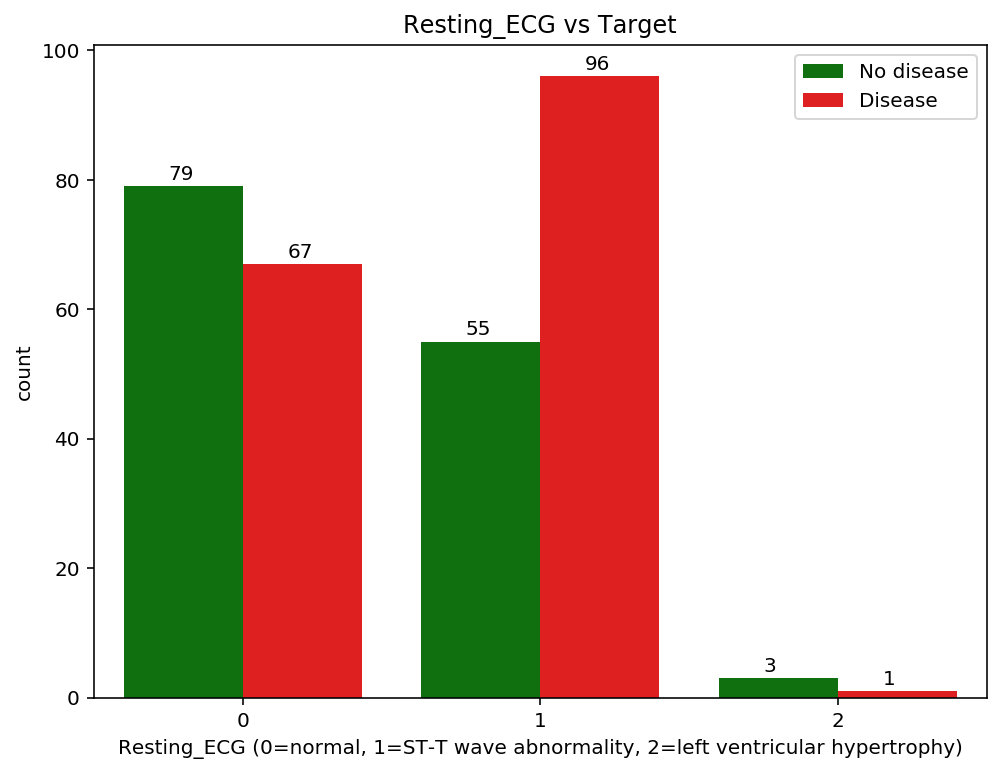

,Average_disease,Count of people
Normal,45.89%,146
ST-T wave abnormality,63.58%,151
Left ventricular hypertrophy,25.0%,4


In [17]:
tgt = plt.subplots(figsize=(8, 6))
tgt = sns.countplot(x="Resting_ECG", hue="Target", data=heart, palette=['Green','Red'])
plt.xlabel('Resting_ECG (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)')
plt.legend(['No disease','Disease'])
plt.title('Resting_ECG vs Target')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc=heart.groupby('Resting_ECG').Target.mean()
perc_c=pd.DataFrame(perc) # creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Resting_ECG').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'})
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) # Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Normal','ST-T wave abnormality','Left ventricular hypertrophy']
perc_c

###### 5.2.1.5) ST_slope vs Target

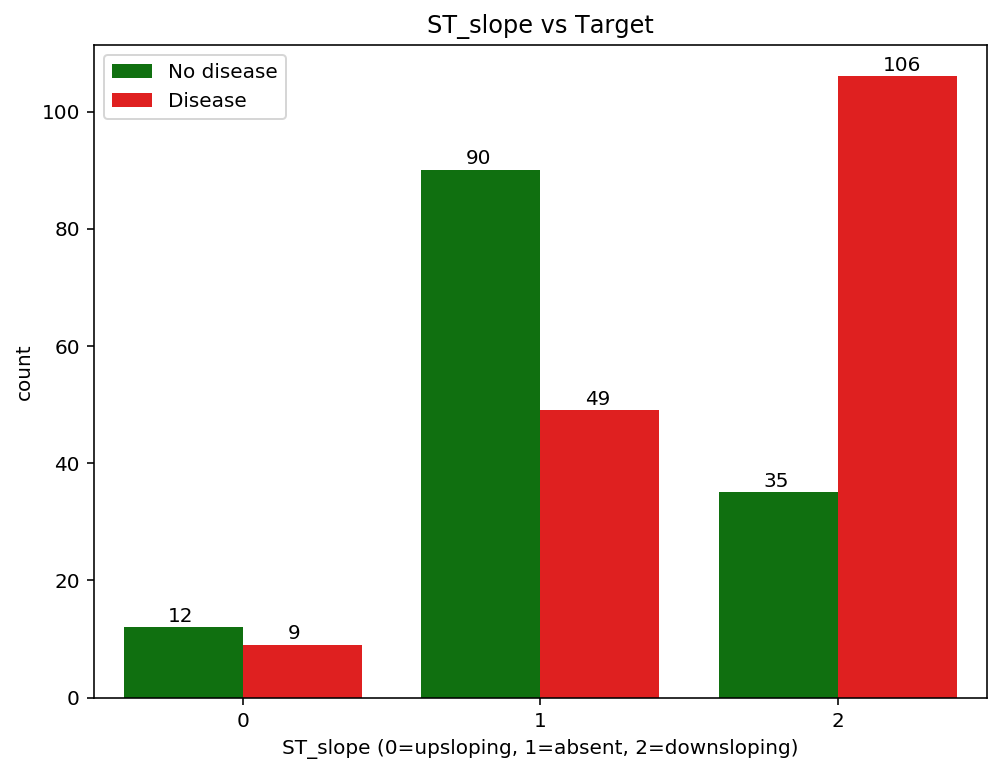

,Average_disease,Count of people
Upsloping,42.86%,21
Absent,35.25%,139
Downsloping,75.18%,141


In [18]:
tgt = plt.subplots(figsize=(8, 6))
tgt = sns.countplot(x="ST_slope", hue="Target", data=heart, palette=['Green','Red'])
plt.xlabel('ST_slope (0=upsloping, 1=absent, 2=downsloping)')
plt.legend(['No disease','Disease'])
plt.title('ST_slope vs Target')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc = heart.groupby('ST_slope').Target.mean()
perc_c = pd.DataFrame(perc)# creating a dataframe to make it look presentable
perc_c['Count of people'] = heart.groupby('ST_slope').Target.count()
perc_c = perc_c.rename(columns = {'Target':'Average_disease'}) # Renaming the column names
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) # Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Upsloping','Absent','Downsloping']
perc_c

###### 5.2.1.6) Thalassemia vs Target

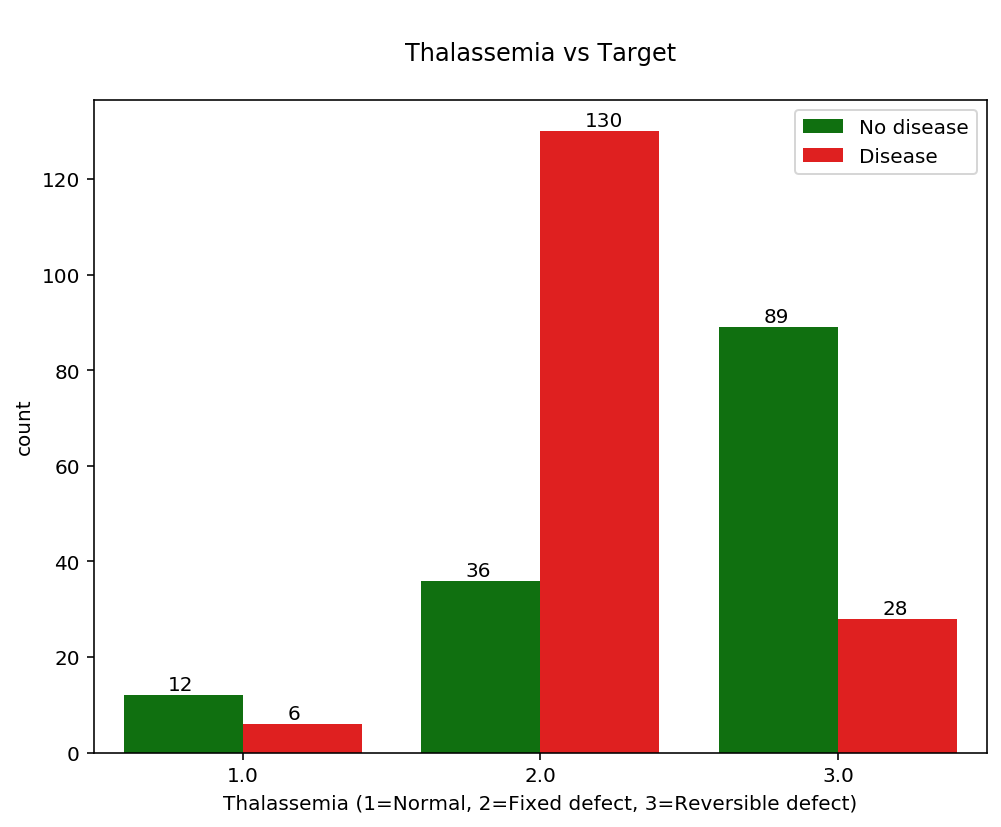

,Average_disease,Count of people
Normal,33.33%,18
Fixed defect,78.31%,166
Reversible defect,23.93%,117


In [19]:
tgt = plt.subplots(figsize=(8, 6))
tgt = sns.countplot(x="Thalassemia", hue="Target", data=heart, palette=['Green','Red'])
plt.xlabel('Thalassemia (1=Normal, 2=Fixed defect, 3=Reversible defect)')
plt.legend(['No disease','Disease'])
plt.title('\nThalassemia vs Target\n')

for p in tgt.patches:
    tgt.annotate('{}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc = heart.groupby('Thalassemia').Target.mean()
perc_c = pd.DataFrame(perc) # creating a dataframe to make it look presentable
perc_c['Count of people'] = heart.groupby('Thalassemia').Target.count()
perc_c = perc_c.rename(columns = {'Target':'Average_disease'})
perc_c['Average_disease'] = perc_c['Average_disease'].apply(reapplycode) # Applying the function above to the dataframe
perc_c['Average_disease'] = perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease'] = perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Normal','Fixed defect','Reversible defect']
perc_c

###### 5.2.1.7) Vessels coloured fluoroscopy vs Target

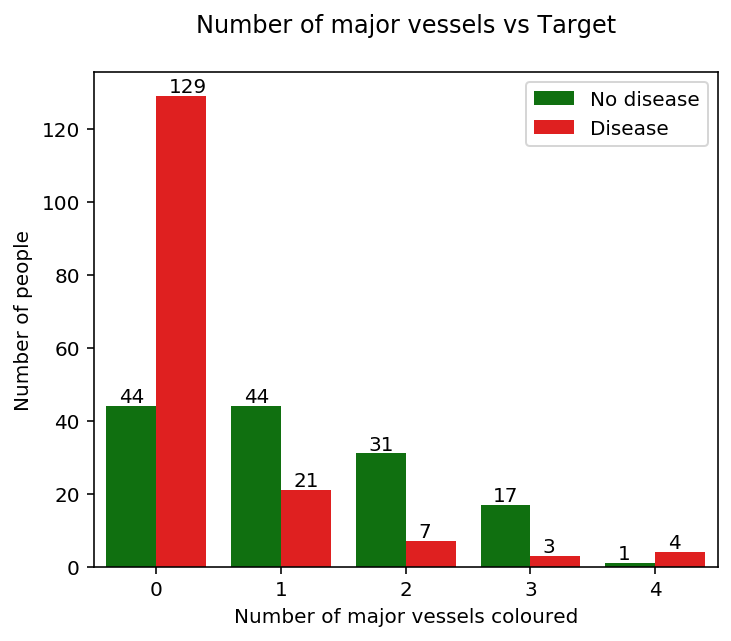

,Average_disease,Count of people
Vessels_coloured_flouroscopy,,
0,74.57%,173
1,32.31%,65
2,18.42%,38
3,15.0%,20
4,80.0%,5


In [20]:
fig,ax=plt.subplots(figsize=(19,10))
plt.subplot(231)
s7=sns.countplot(x='Vessels_coloured_flouroscopy',data=heart,hue='Target',palette=('Green','Red'),linewidth=3)
s7.set_title('Number of major vessels vs Target\n')
plt.legend(['No disease','Disease'])
plt.xlabel('Number of major vessels coloured')
plt.ylabel('Number of people')

# For loop to display the count on top of bars in the countplot
for p in s7.patches:
    s7.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc=heart.groupby('Vessels_coloured_flouroscopy').Target.mean()
perc_c=pd.DataFrame(perc) # creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Vessels_coloured_flouroscopy').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'})
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) # Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c

###### 5.2.1.8) Excercise induced angina vs Target

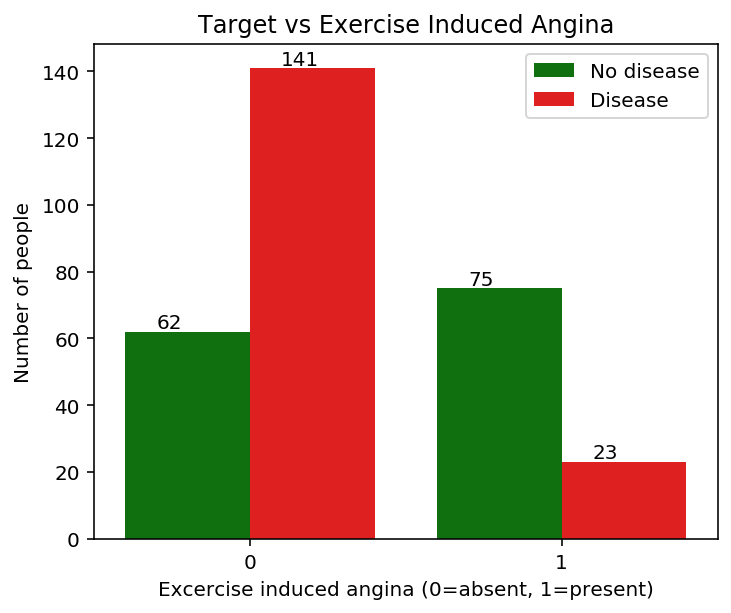

,Average_disease,Count of people
Angina,69.46%,203
No angina,23.47%,98


In [21]:
fig,ax=plt.subplots(figsize=(19,10))
plt.subplot(231)
s7=sns.countplot(x='Exercise_Induced_Angina',data=heart,hue='Target',palette=('Green','Red'),linewidth=3)
s7.set_title('Target vs Exercise Induced Angina')
plt.legend(['No disease','Disease'])
plt.xlabel('Excercise induced angina (0=absent, 1=present)')
plt.ylabel('Number of people')

# For loop to display the count on top of bars in the countplot
for p in s7.patches:
    s7.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+1))
plt.show()

# Table to display the average percent of people with heart disease and the total number of people in that category
perc=heart.groupby('Exercise_Induced_Angina').Target.mean()
perc_c=pd.DataFrame(perc) # creating a dataframe to make it look presentable
perc_c['Count of people']=heart.groupby('Exercise_Induced_Angina').Target.count()
perc_c=perc_c.rename(columns={'Target':'Average_disease'})
perc_c['Average_disease']=perc_c['Average_disease'].apply(reapplycode) # Applying the function above to the dataframe
perc_c['Average_disease']=perc_c['Average_disease'].round(decimals=2) # Rounding the average percentages to two digits
perc_c['Average_disease']=perc_c['Average_disease'].astype(str)+'%'
perc_c.index=['Angina','No angina']
perc_c

##### 5.2.2) Numerical variable analysis

###### In this section , we shall perform bivariate analysis for response variable -Target with each of the numerical variables-age, resting blood pressure, cholesterol, Maximum heart rate, ST depression (5 variables)

###### 5.2.2.1) Maximum heart rate vs Target

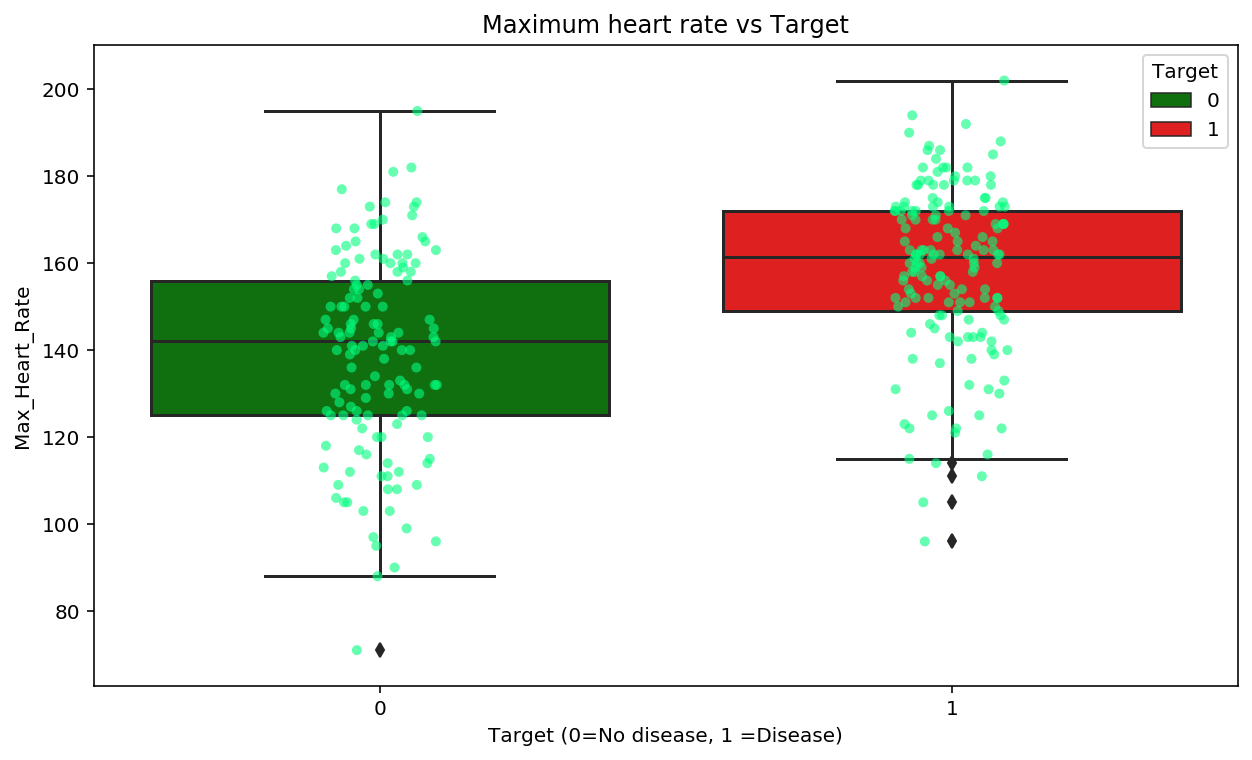

In [22]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='Max_Heart_Rate',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='Max_Heart_Rate', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Maximum heart rate vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

In [23]:
# Table to display the details from above graph in percentage and total count 
# Dividing the heart rate into three segments
low = heart[(heart['Max_Heart_Rate'] <= 120)]
middle = heart[(heart['Max_Heart_Rate'] > 121) & (heart['Max_Heart_Rate'] <= 170)]
high = heart[(heart['Max_Heart_Rate'] > 170)]
hlow = low[low['Target'] == 1]
hmid = middle[middle['Target'] == 1]
hhigh = high[high['Target'] == 1]
lol = len(low)
lom = len(middle)
loh = len(high)
poy = len(hlow) / len(low)*100
pom = len(hmid) / len(middle)*100
poo = len(hhigh) / len(high)*100
dat = pd.DataFrame(data = [[poy,lol],[pom,lom],[poo,loh]],index=['Low heart rate','Medium heart rate','High heart rate'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2)
dat

,Percentage of disease,Number of people
Low heart rate,16.67,36
Medium heart rate,52.43,206
High heart rate,84.48,58


<Figure size 432x288 with 0 Axes>

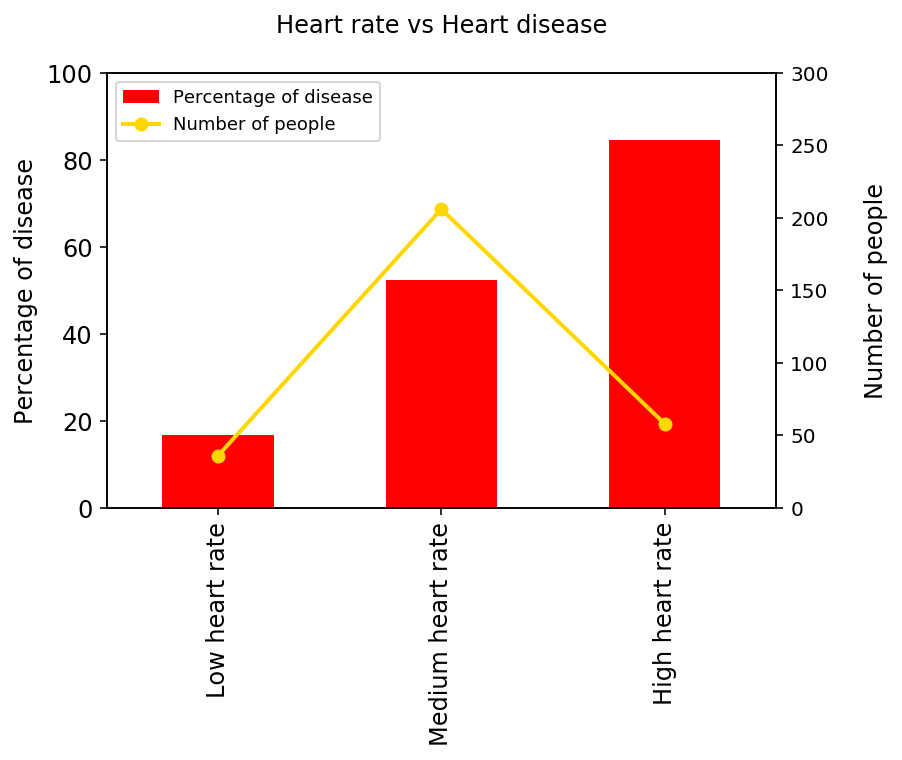

In [24]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('Heart rate vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)

###### 5.2.2.2) Age vs Target

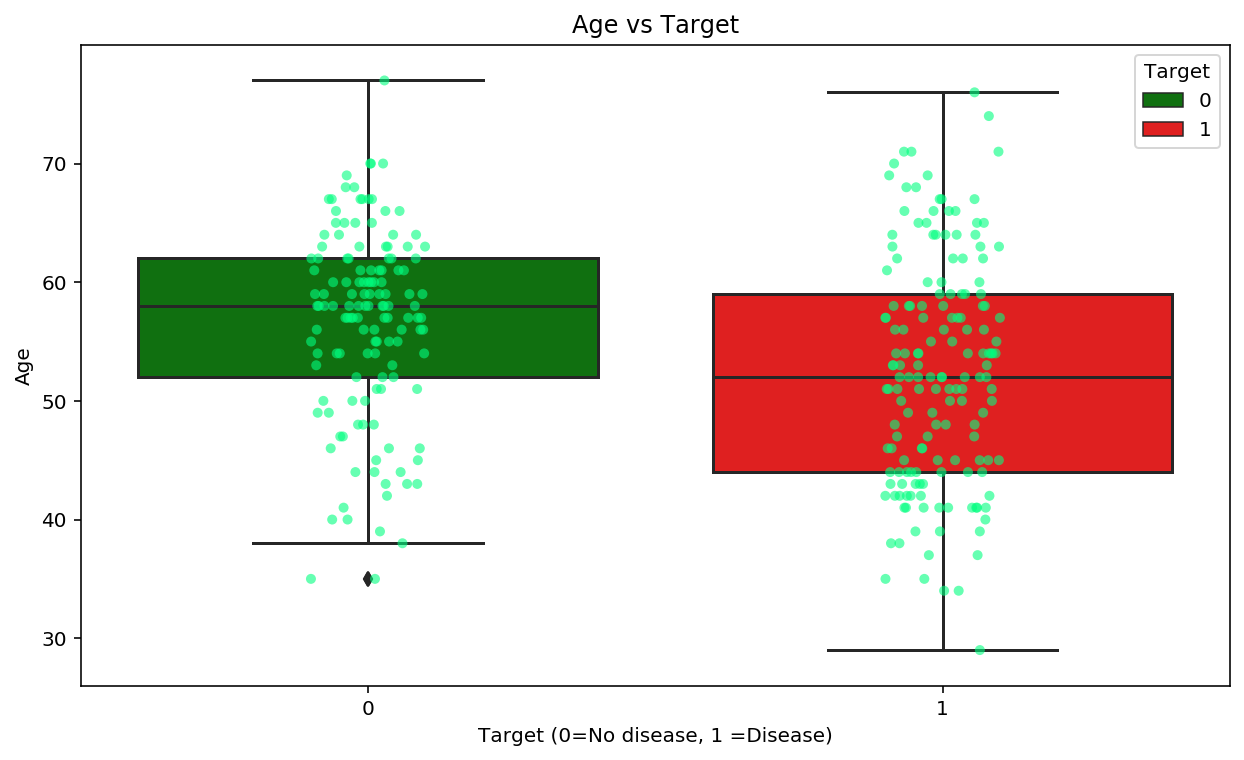

In [25]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7 = sns.boxplot(x='Target',y='Age',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7 = sns.stripplot(y='Age', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Age vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

In [26]:
# Dividing the age into three segments
young=heart[(heart['Age']<=35)]
middle=heart[(heart['Age']>36) & (heart['Age']<55)]
old=heart[(heart['Age']>55)]
hyoung=young[young['Target']==1]
hmid=middle[middle['Target']==1]
hold=old[old['Target']==1]
loy=len(young)
lom=len(middle)
loo=len(old)
poy=len(hyoung)/len(young)*100
pom=len(hmid)/len(middle)*100
poo=len(hold)/len(old)*100
dat=pd.DataFrame(data=[[poy,loy],[pom,lom],[poo,loo]],index=['Young people','Middle people','Old people'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
dat

,Percentage of disease,Number of people
Young people,71.43,7
Middle people,69.63,135
Old people,41.06,151


<Figure size 432x288 with 0 Axes>

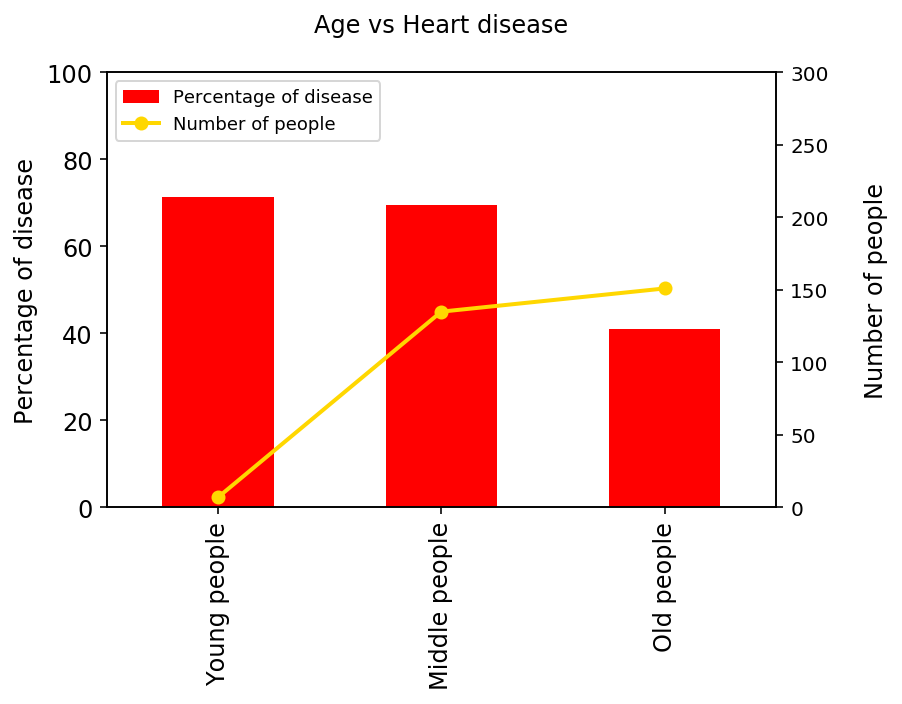

In [27]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('Age vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)

###### 5.2.2.3) Resting_BP vs Target

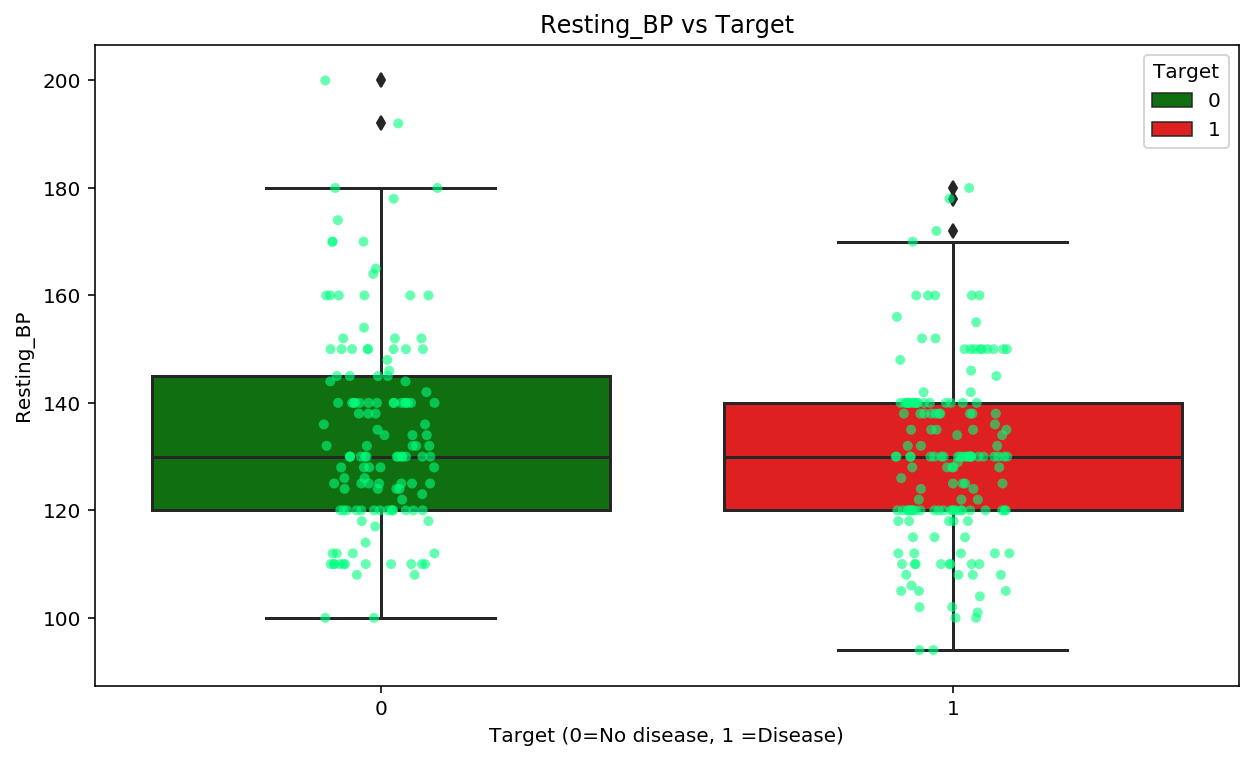

In [28]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='Resting_BP',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='Resting_BP', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Resting_BP vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

In [29]:
# Dividing the Resting_BP into three segments
low=heart[(heart['Resting_BP']<=100)]
mid=heart[(heart['Resting_BP']>100) & (heart['Resting_BP']<139)]
high=heart[(heart['Resting_BP']>140)]
hlow=low[low['Target']==1]
hmid=mid[mid['Target']==1]
hhigh=high[high['Target']==1]
lol=len(low)
lom=len(mid)
loh=len(high)
pol=len(hlow)/len(low)*100
pom=len(hmid)/len(mid)*100
poh=len(high)/len(high)*100
dat=pd.DataFrame(data=[[pol,lol],[pom,lom],[poh,loh]],index=['Low BP','Medium BP','High BP'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
dat

,Percentage of disease,Number of people
Low BP,66.67,6
Medium BP,58.59,198
High BP,100.00,65


<Figure size 432x288 with 0 Axes>

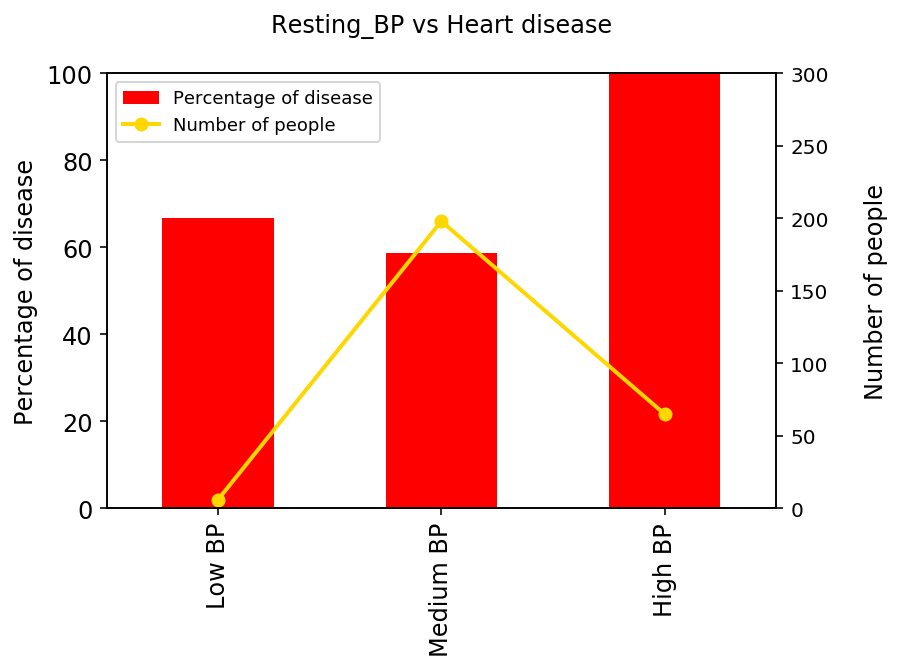

In [30]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('Resting_BP vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)

###### 5.2.2.4) Cholesterol vs Target

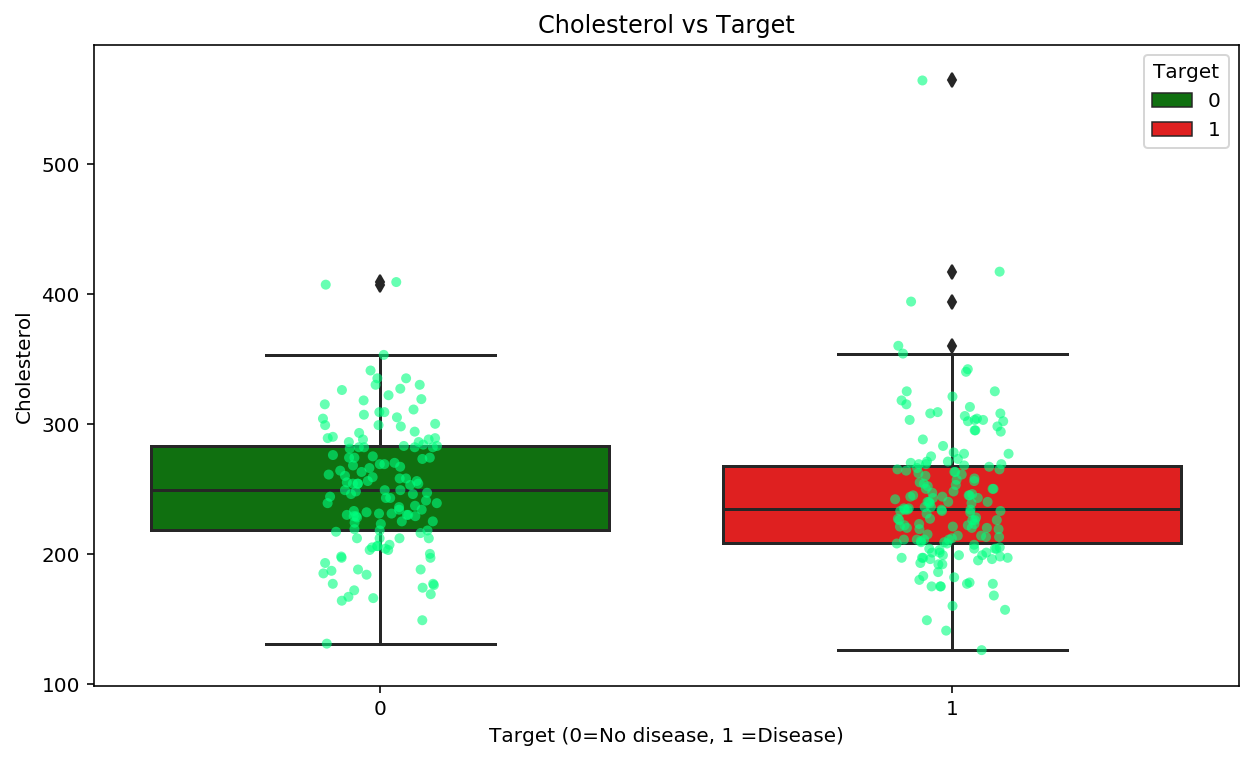

In [31]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='Cholesterol',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='Cholesterol', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('Cholesterol vs Target')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

In [32]:
young=heart[(heart['Cholesterol']<=160)]
middle=heart[(heart['Cholesterol']>160) & (heart['Cholesterol']<279)]
old=heart[(heart['Cholesterol']>280)]
hyoung=young[young['Target']==1]
hmid=middle[middle['Target']==1]
hold=old[old['Target']==1]
loy=len(young)
lom=len(middle)
loo=len(old)
poy=len(hyoung)/len(young)*100
pom=len(hmid)/len(middle)*100
poo=len(hold)/len(old)*100
dat=pd.DataFrame(data=[[poy,loy],[pom,lom],[poo,loo]],index=['Normal Cholesterol','Mildly High Cholesterol','High Cholesterol'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2) # Rounding the average percentages to two digits
dat

,Percentage of disease,Number of people
Normal Cholesterol,71.43,7
Mildly High Cholesterol,58.04,224
High Cholesterol,41.43,70


<Figure size 432x288 with 0 Axes>

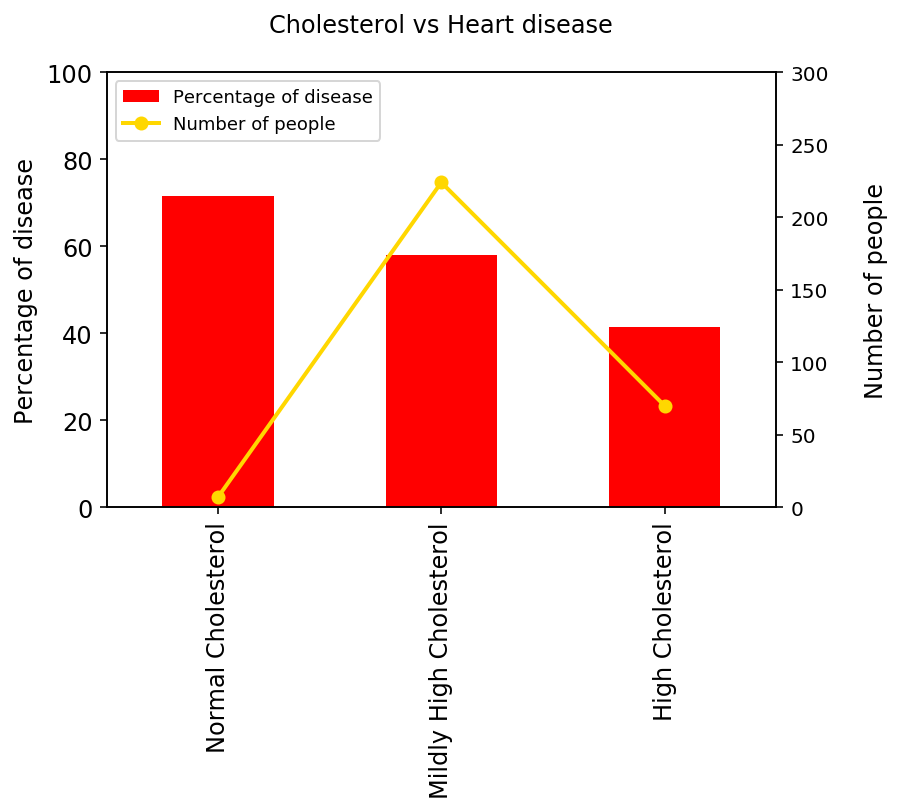

In [33]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('Cholesterol vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)

###### 5.2.2.5) ST_depression vs heart disease

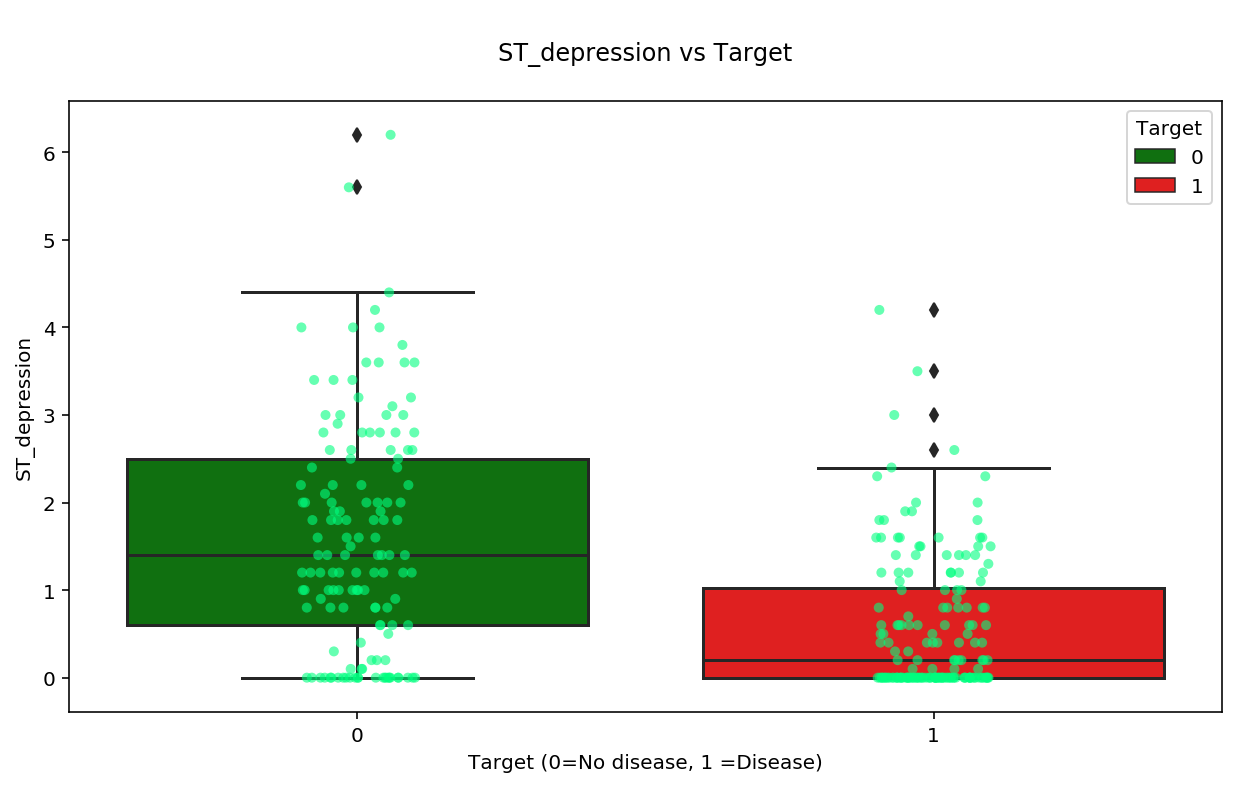

In [34]:
fig,ax=plt.subplots(figsize=(25,10))
plt.subplot(231)
s7=sns.boxplot(x='Target',y='ST_depression',data=heart,hue='Target',palette=('Green','Red'),dodge=False)
s7=sns.stripplot(y='ST_depression', x='Target',data=heart, marker='o',color="springgreen",alpha=0.6)
s7.set_title('\nST_depression vs Target\n')
s7.set_xlabel('Target (0=No disease, 1 =Disease)')
plt.tight_layout()
plt.show()

In [35]:
fatal=heart[(heart['ST_depression']<=0.15)]
mild=heart[(heart['ST_depression']>0.15) & (heart['ST_depression']<2.5)]
normal=heart[(heart['ST_depression']>=2.5)]
hfatal=fatal[fatal['Target']==1]
hmild=mild[mild['Target']==1]
hnormal=normal[normal['Target']==1]
lon=len(normal)
lom=len(mild)
lof=len(fatal)
pon=len(hnormal)/len(normal)*100
pom=len(hmild)/len(mild)*100
pof=len(hfatal)/len(fatal)*100
dat=pd.DataFrame(data=[[pon,lon],[pom,lom],[pof,lof]],index=['Normal ST','Mild ST','Fatal ST'],columns=['Percentage of disease','Number of people'])
dat['Percentage of disease']=dat['Percentage of disease'].round(decimals=2)
dat

,Percentage of disease,Number of people
Normal ST,10.00,40
Mild ST,53.21,156
Fatal ST,73.33,105


<Figure size 432x288 with 0 Axes>

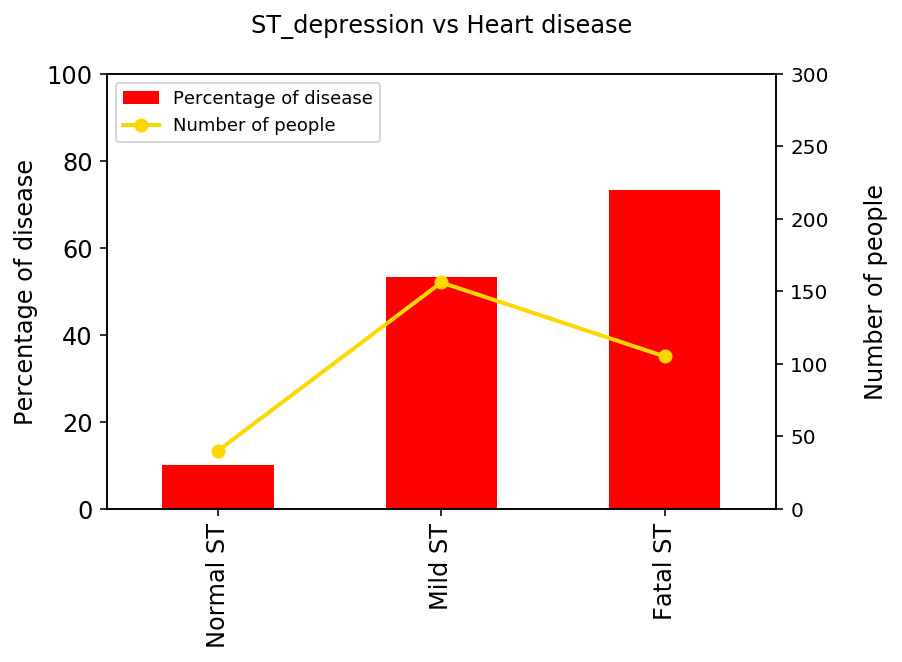

In [36]:
fig = plt.figure()
ax = dat[['Percentage of disease']].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),dat[['Number of people']].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_ylim((0, 100))
ax2.set_ylim((0,300))
ax.set_title('ST_depression vs Heart disease\n',fontsize=12)
ax.set_ylabel("Percentage of disease",fontsize=12)
ax2.set_ylabel("\nNumber of people",fontsize=12)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left",fontsize=9)

###### 5.2.3 Result of bivariate analysis

In [37]:
# Basis the above analysis, we segment the predictors into three groups:
prelim_tab=pd.DataFrame(columns=['Good','Bad','Maybe'],data=[['Chest_pain','Fasting_Blood_Sugar','Maximum heart rate'],['Sex','Age','Cholesterol'],['ST_Slope','-','Thalassemia'],['ST_depression','-','Resting_ECG'],['Number of major vessels','-','Excercise_Induced_Angina']])
prelim_tab

,Good,Bad,Maybe
0,Chest_pain,Fasting_Blood_Sugar,Maximum heart rate
1,Sex,Age,Cholesterol
2,ST_Slope,-,Thalassemia
3,ST_depression,-,Resting_ECG
4,Number of major vessels,-,Excercise_Induced_Angina


###### 5.3) Correlation and heat map

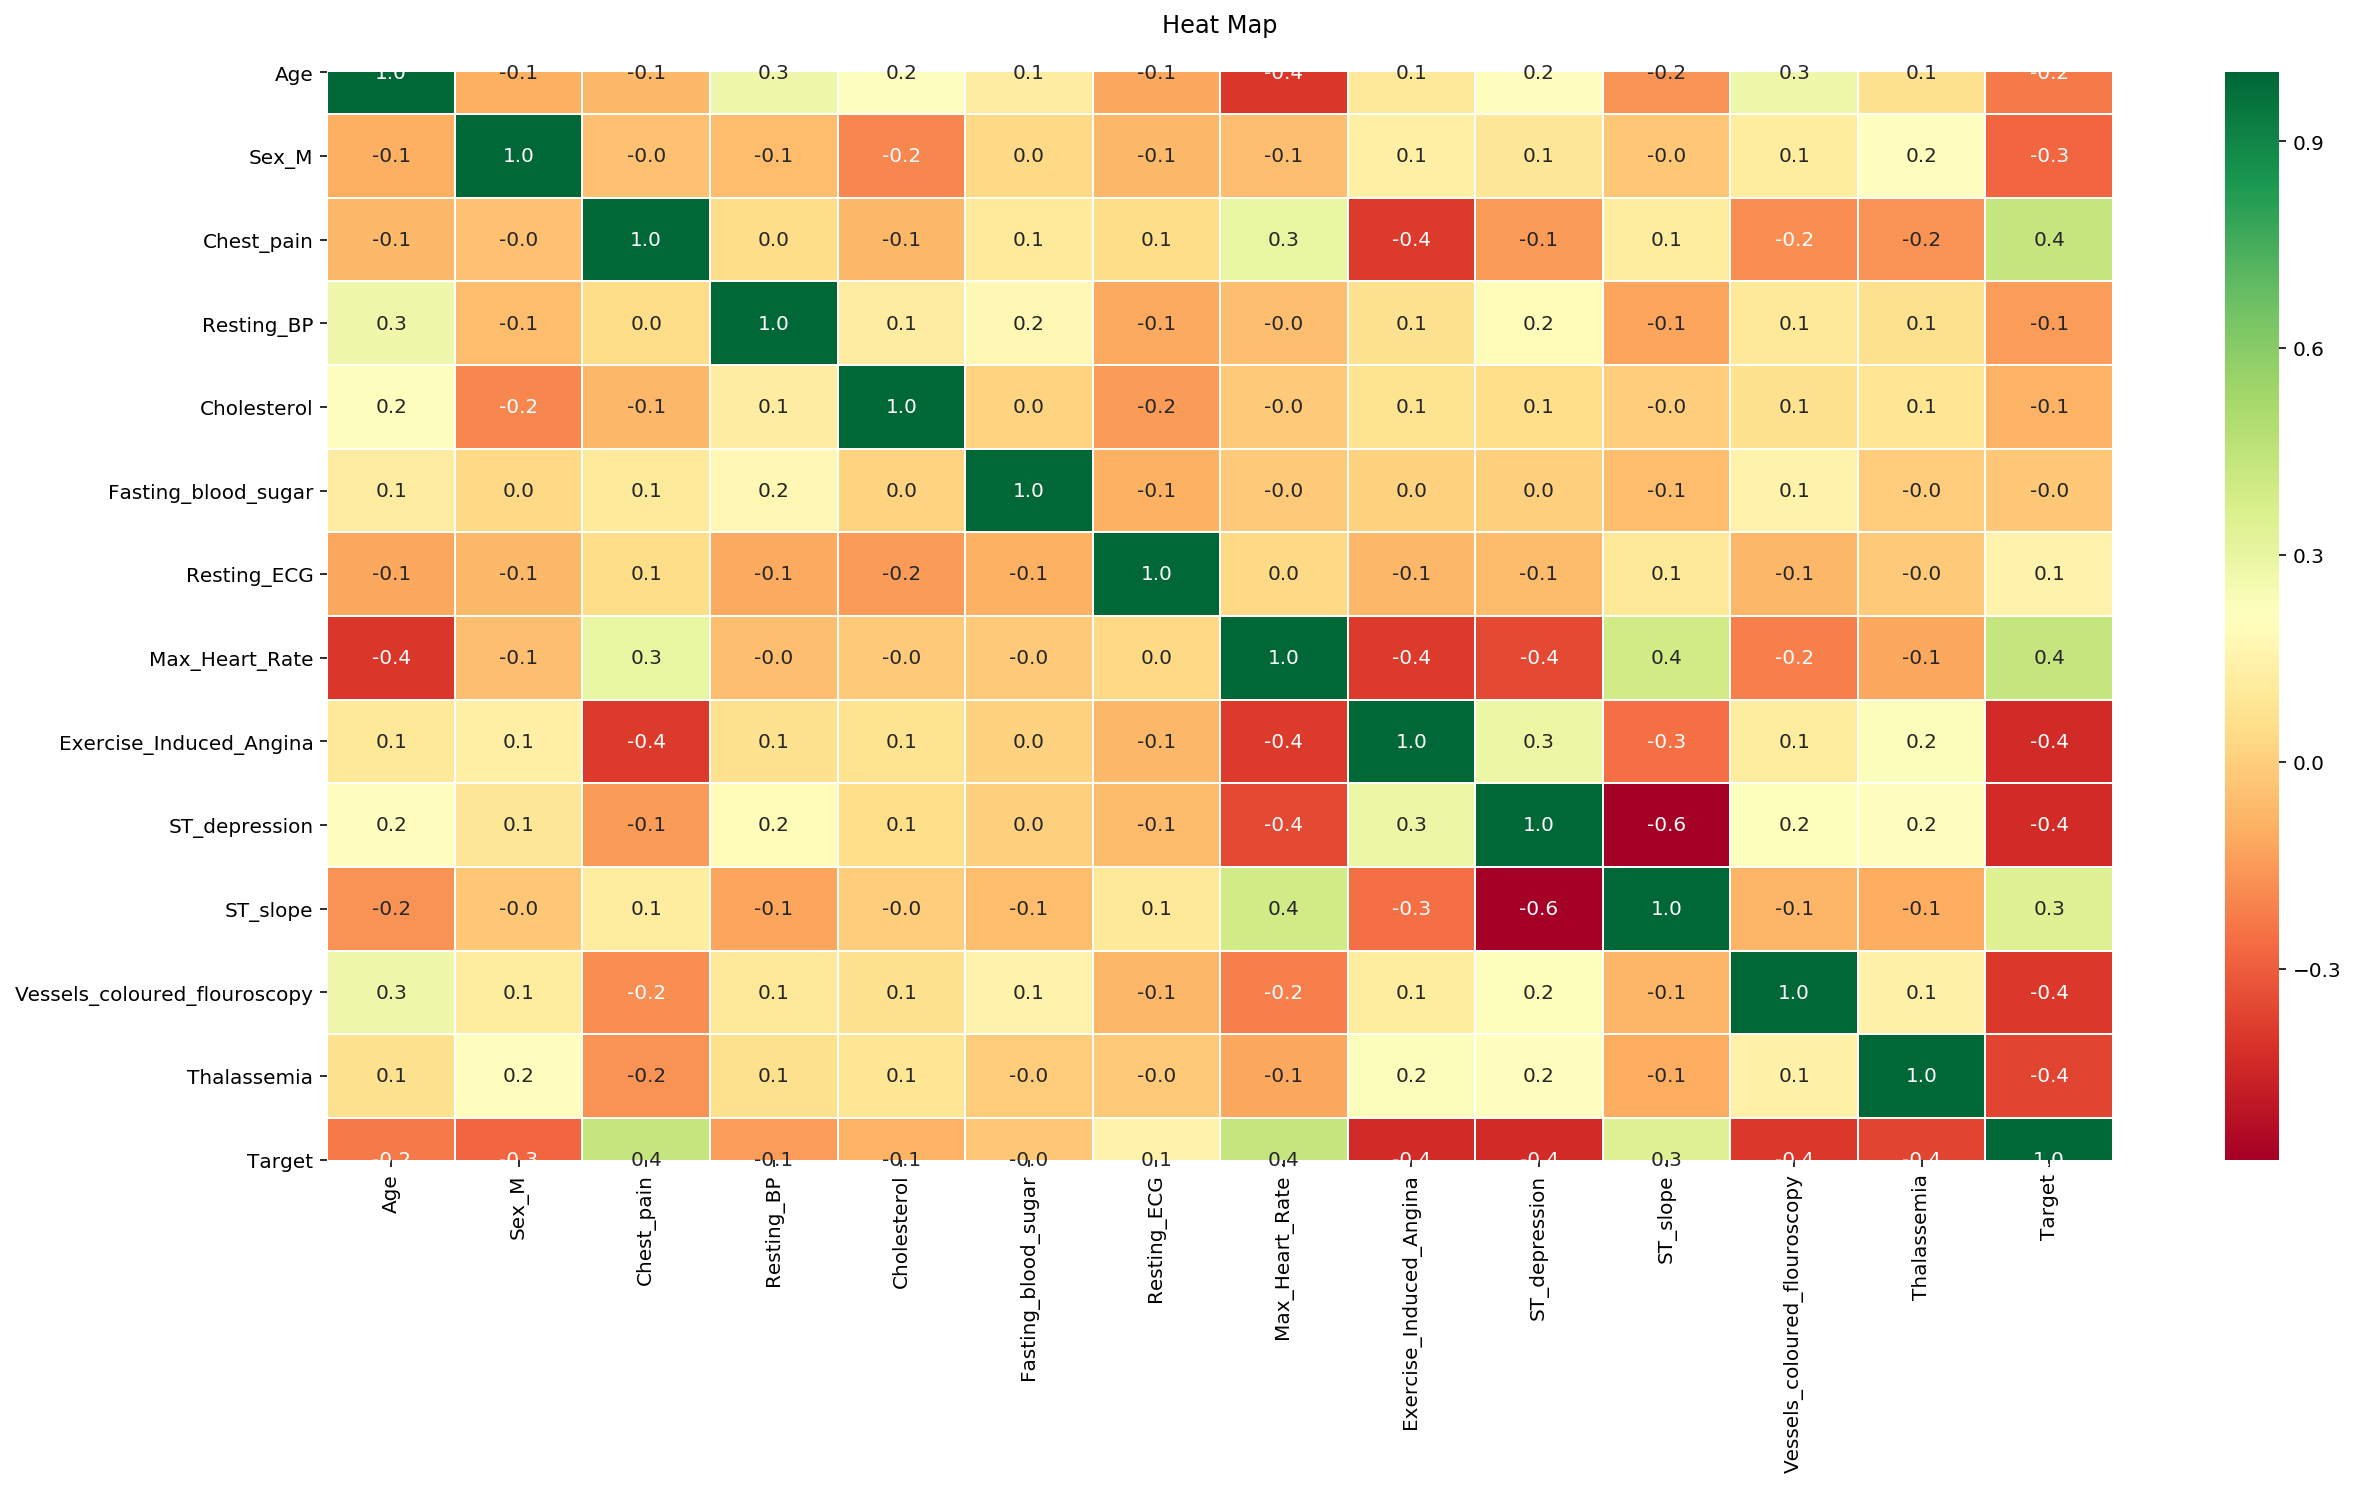

In [38]:
# Correlation using heatmap
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(heart.corr(),annot=True,linewidths=.5,cmap='RdYlGn',fmt='.1f',ax=ax)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Heat Map\n')
plt.show()

In [39]:
# Basis the analysis and heat map, updating the previous table of 'Good, Bad and May_be' predictors.
prelim_tab = pd.DataFrame(columns=['Good','Bad','Maybe'],data=[['Chest_pain','Fasting_Blood_Sugar','Cholesterol'],['Sex','Age','Resting_ECG'],['ST_Slope','-','-'],['ST_depression','-','-'],['Number of major vessels','-','-'],['Excercise_Induced_Angina','-','-'],['Thalassemia','-','-'],['Maximum heart rate','-','-']])
prelim_tab

,Good,Bad,Maybe
0,Chest_pain,Fasting_Blood_Sugar,Cholesterol
1,Sex,Age,Resting_ECG
2,ST_Slope,-,-
3,ST_depression,-,-
4,Number of major vessels,-,-
5,Excercise_Induced_Angina,-,-
6,Thalassemia,-,-
7,Maximum heart rate,-,-


##### 5.4) Multivariate analysis

###### In this case , we shall perform analysis for three or more variables 

###### 5.4.1) ST_slope vs ST_Depression vs Target

Text(0.5, 1.0, 'ST_slope vs ST_Depression vs Target\n')

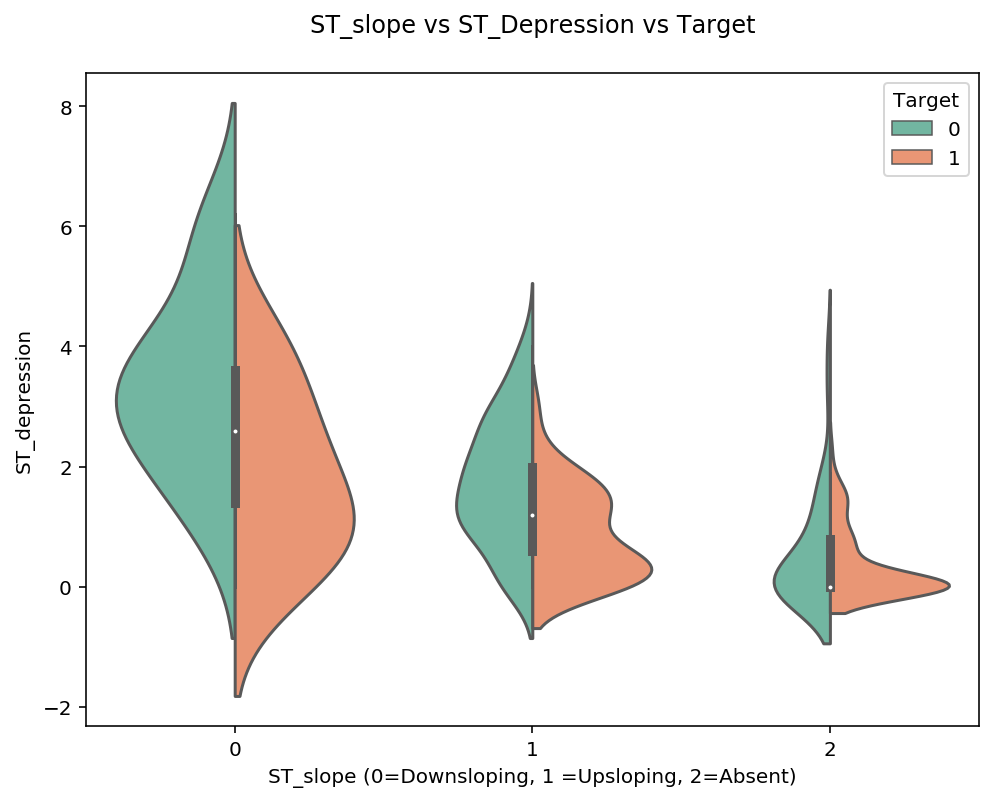

In [40]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.violinplot(x="ST_slope", y="ST_depression", hue="Target", kind="box", data=heart, palette="Set2",split=True,label=['No disease', 'Disease'])
plt.xlabel('ST_slope (0=Downsloping, 1 =Upsloping, 2=Absent)')
plt.title('ST_slope vs ST_Depression vs Target\n')

###### 5.4.2) Sex vs Fasting_blood_sugar vs Target

Text(0.5, 1.0, 'Sex vs Fasting_blood_sugar vs Target\n')

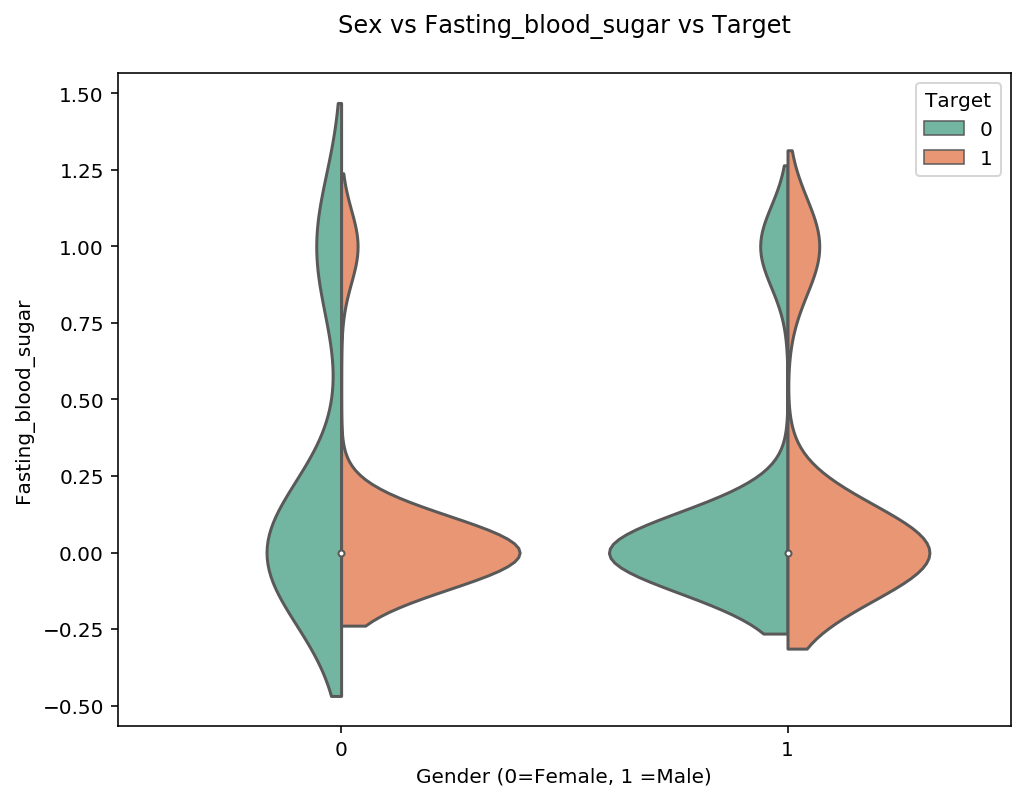

In [41]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.violinplot(x="Sex_M", y="Fasting_blood_sugar", hue="Target", kind="box", data=heart, palette="Set2",split=True,label=['No disease', 'Disease'])
plt.xlabel('Gender (0=Female, 1 =Male)')
plt.title('Sex vs Fasting_blood_sugar vs Target\n')

###### 5.4.3) Maximum heart rate vs Age vs Exercise_induced_angina

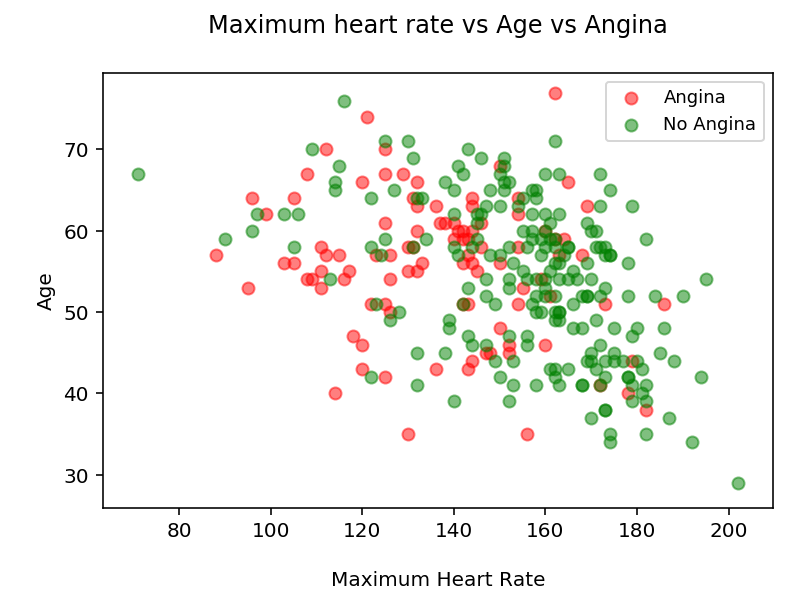

In [42]:
plt.scatter(x=heart.Max_Heart_Rate[heart.Exercise_Induced_Angina==1], y=heart.Age[(heart.Exercise_Induced_Angina==1)],alpha=0.5, c="Red")
plt.scatter(x=heart.Max_Heart_Rate[heart.Exercise_Induced_Angina==0], y=heart.Age[(heart.Exercise_Induced_Angina==0)],alpha=0.5, c="Green")
plt.legend(["Angina", "No Angina"],fontsize=9)
plt.xlabel("\nMaximum Heart Rate")
plt.ylabel("\nAge")
plt.title("Maximum heart rate vs Age vs Angina\n")
plt.show()

###### 5.4.4) Max_Heart_Rate vs Age vs Resting_BP vs Target

Text(0.5, 1, 'Max_Heart_Rate vs Age vs Resting_BP vs Target\n')

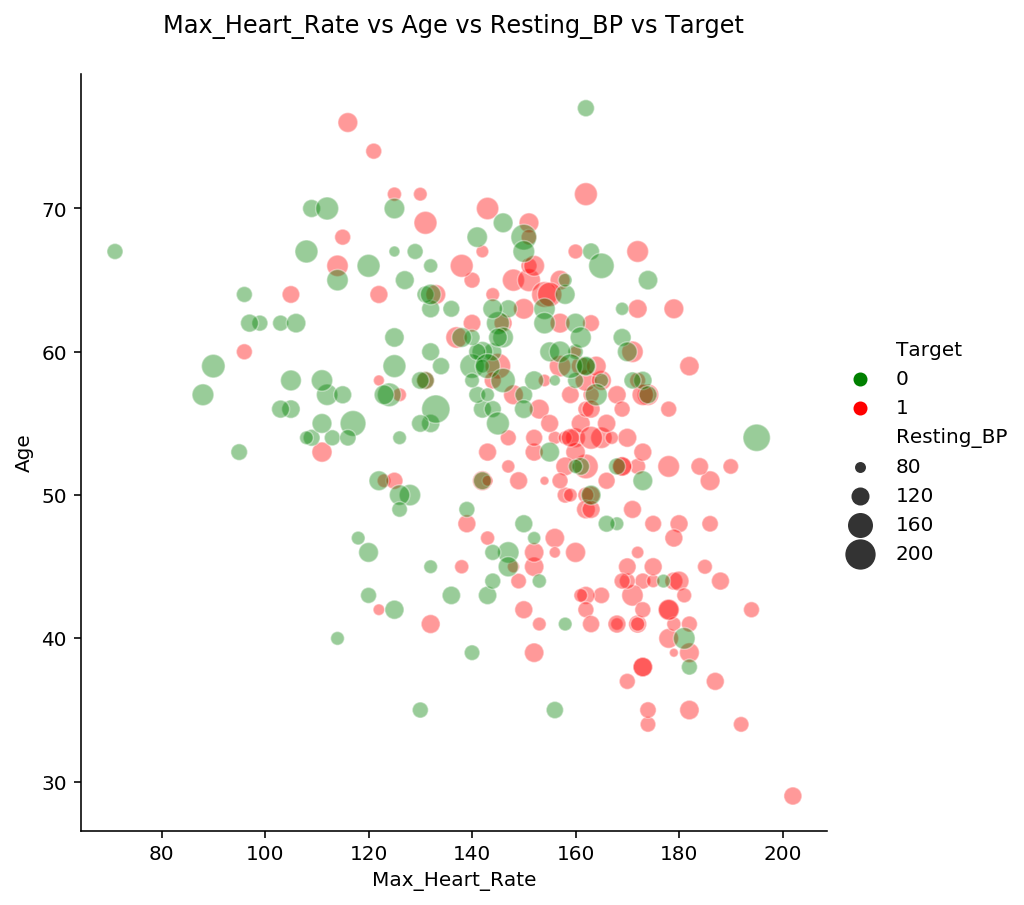

In [43]:
sns.relplot(x="Max_Heart_Rate", y="Age", hue="Target",size="Resting_BP",sizes=(20, 200),palette=["g", "r"],alpha=.4,height=6, data=heart)
plt.title("Max_Heart_Rate vs Age vs Resting_BP vs Target\n")

#### Data Modelling

In [44]:
# creating dummy variables
dummy=pd.get_dummies(heart_[['Resting_BP','Cholesterol','Max_Heart_Rate','ST_depression','Sex_M','Chest_pain','Resting_ECG','Exercise_Induced_Angina','ST_slope','Vessels_coloured_flouroscopy','Thalassemia','Fasting_blood_sugar']],drop_first=True)
dummy.head()

,Resting_BP,Cholesterol,Max_Heart_Rate,ST_depression,Vessels_coloured_flouroscopy,Thalassemia,Sex_M_Male,Chest_pain_Atypical angina,Chest_pain_Non-anginal pain,Chest_pain_Typical angina,Resting_ECG_Normal,Resting_ECG_ST Abnormality,Exercise_Induced_Angina_Yes,ST_slope_Downsloping,ST_slope_Upsloping,Fasting_blood_sugar_Yes
0,145,233,150,2.3,0,1.0,1,0,0,0,1,0,0,0,0,1
1,130,250,187,3.5,0,2.0,1,0,1,0,0,1,0,0,0,0
2,130,204,172,1.4,0,2.0,0,1,0,0,1,0,0,1,0,0
3,120,236,178,0.8,0,2.0,1,1,0,0,0,1,0,1,0,0
4,120,354,163,0.6,0,2.0,0,0,0,1,0,1,1,1,0,0


In [45]:
# Logistic regression
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
lr=linear_model.LogisticRegression()
prediction=lr.fit(X=dummy,y=heart['Target'])
values=np.append(prediction.intercept_,prediction.coef_)
names=np.append('Intercept',dummy.columns)
results=pd.DataFrame(values,index=names,columns=['Coefficient'])
results['Odd_ratios']=np.exp(results)
results

,Coefficient,Odd_ratios
Intercept,0.330410,1.391539
Resting_BP,-0.005365,0.994649
Cholesterol,-0.002251,0.997752
Max_Heart_Rate,0.032993,1.033543
ST_depression,-0.378064,0.685187
Vessels_coloured_flouroscopy,-0.758033,0.468587
Thalassemia,-0.720582,0.486469
Sex_M_Male,-1.372085,0.253578
Chest_pain_Atypical angina,-0.106021,0.899405
Chest_pain_Non-anginal pain,0.625917,1.869961


1) Model 1

AUC: 0.8583333333333333


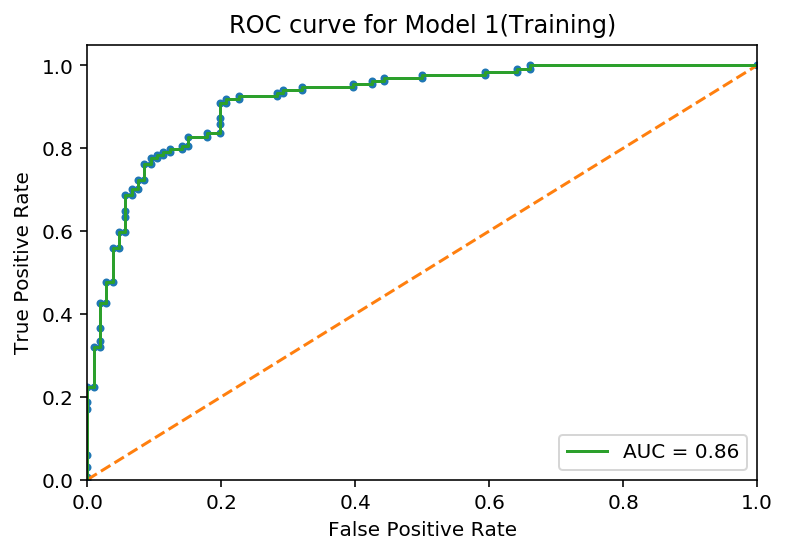

In [46]:
# Basis the above prediction of 'good, bad or may be', taking good variables only- chest_pain,sex,ST_slope,ST_depression,Number of major #vessels,Exercise induced angina,thalassemia,max heart rate
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

y,x=dmatrices('Target~Chest_pain+Sex_M+ST_slope+ST_depression+Vessels_coloured_flouroscopy+Exercise_Induced_Angina+Max_Heart_Rate+Thalassemia',heart)

# splitting the data into 80 percent training and 20 percent validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
lr=linear_model.LogisticRegression().fit(x_train,y_train)
y_pred_prod=lr.predict_proba(x_train)[:,1]
fpr,tpr,thresholds=roc_curve(y_train,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC curve for Model 1(Training)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
auc=lr.score(x_train,y_train)
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.legend(loc="lower right")
print('AUC:',auc)

AUC: 0.8524590163934426


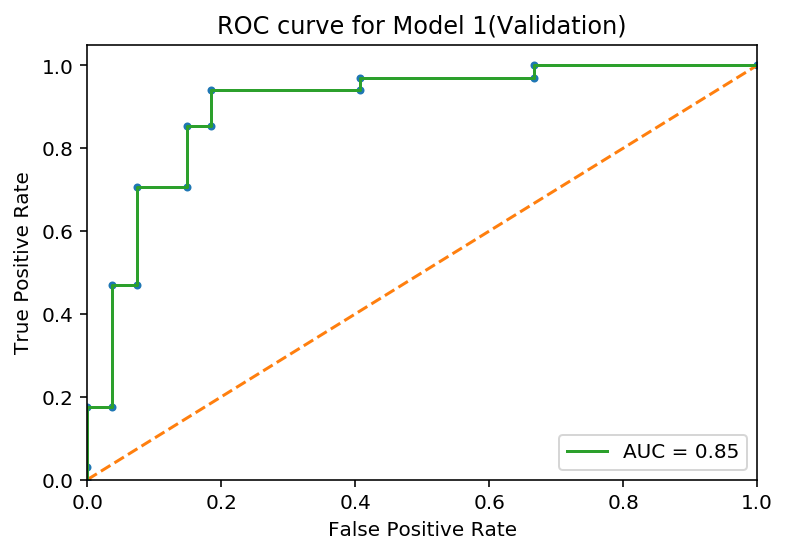

In [52]:
# Model 1- Validation
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

y,x=dmatrices('Target~Chest_pain+Sex_M+ST_slope+ST_depression+Vessels_coloured_flouroscopy+Exercise_Induced_Angina+Max_Heart_Rate+Thalassemia',heart)
y_pred_prod=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC curve for Model 1(Validation)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
auc=lr.score(x_test,y_test)
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.legend(loc="lower right")
print('AUC:',auc)

2) Model 2

AUC: 0.85


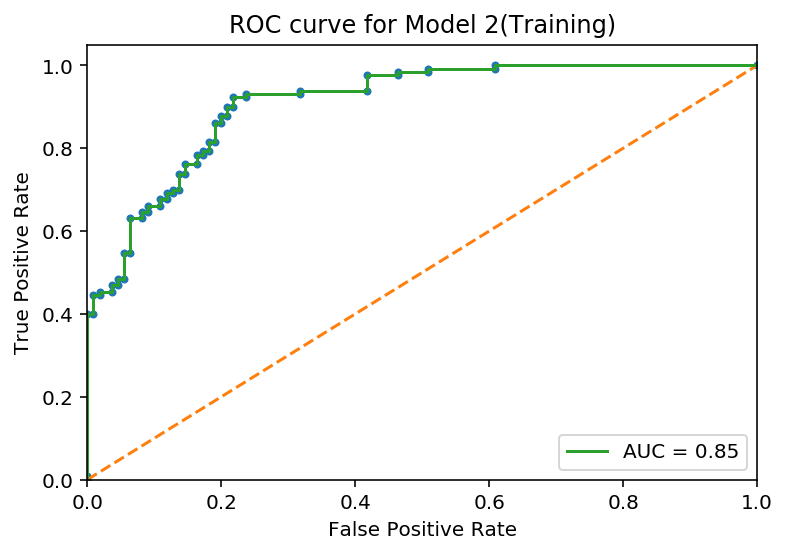

In [48]:
# Model 2- Adding 'Good' with 'May be' variables- Training
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

y,x=dmatrices('Target~Chest_pain+Sex_M+ST_slope+ST_depression+Vessels_coloured_flouroscopy+Exercise_Induced_Angina+Max_Heart_Rate+Resting_ECG+Cholesterol',heart)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=linear_model.LogisticRegression().fit(x_train,y_train)
y_pred_prod=lr.predict_proba(x_train)[:,1]
fpr,tpr,thresholds=roc_curve(y_train,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC curve for Model 2(Training)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
auc=lr.score(x_train,y_train)
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.legend(loc="lower right")
print('AUC:',auc)

AUC: 0.8524590163934426


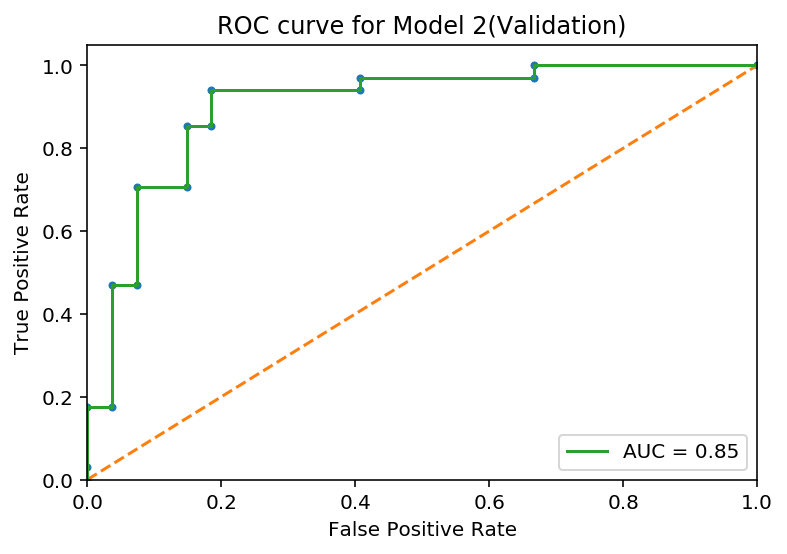

In [49]:
# Model 2- Validation
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

y,x=dmatrices('Target~Chest_pain+Sex_M+ST_slope+ST_depression+Vessels_coloured_flouroscopy+Exercise_Induced_Angina+Max_Heart_Rate+Resting_ECG+Cholesterol',heart)
lr=linear_model.LogisticRegression().fit(x_train,y_train)
y_pred_prod=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC curve for Model 2(Validation)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
auc=lr.score(x_test,y_test)
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.legend(loc="lower right")
print('AUC:',auc)

3) Model 3

AUC: 0.85


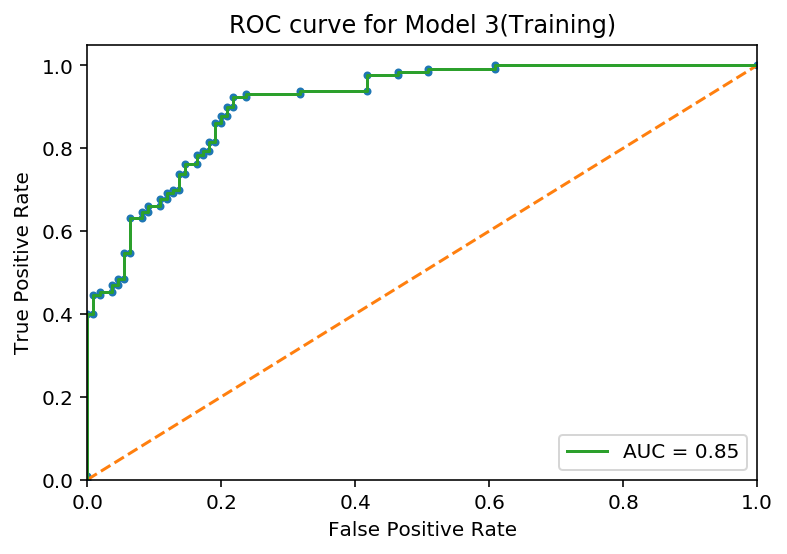

In [50]:
#  Model 3- adding 'Good', 'Maybe Good' and 'Bad' predictors- Training
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

y,x=dmatrices('Target~Chest_pain+Sex_M+ST_slope+ST_depression+Vessels_coloured_flouroscopy+Exercise_Induced_Angina+Max_Heart_Rate+Fasting_blood_sugar+Age+Cholesterol+Resting_ECG',heart)
lr=linear_model.LogisticRegression().fit(x_train,y_train)
y_pred_prod=lr.predict_proba(x_train)[:,1]
fpr,tpr,thresholds=roc_curve(y_train,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC curve for Model 3(Training)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
auc=lr.score(x_train,y_train)
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.legend(loc="lower right")
print('AUC:',auc)

AUC: 0.8524590163934426


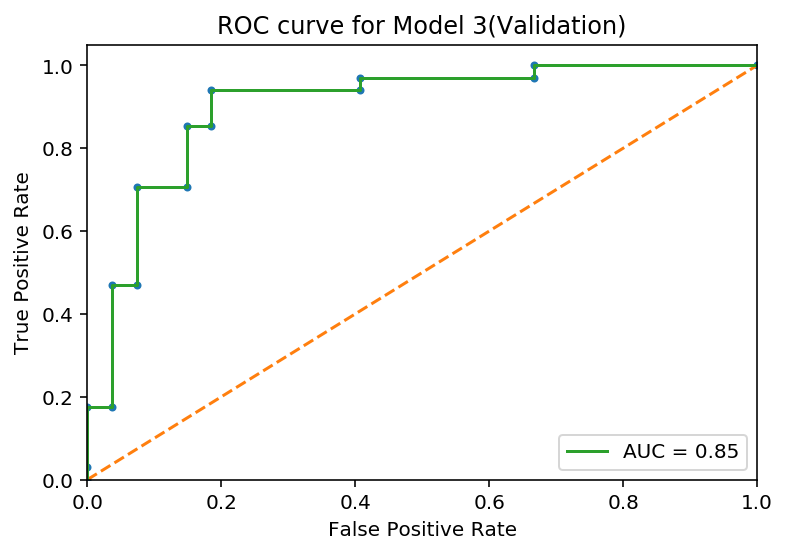

In [51]:
#  Model 3- Validation
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

y,x=dmatrices('Target~Chest_pain+Sex_M+ST_slope+ST_depression+Vessels_coloured_flouroscopy+Exercise_Induced_Angina+Max_Heart_Rate+Fasting_blood_sugar+Age+Cholesterol+Resting_ECG',heart)
lr=linear_model.LogisticRegression().fit(x_train,y_train)
y_pred_prod=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prod)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC curve for Model 3(Validation)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
auc=lr.score(x_test,y_test)
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.legend(loc="lower right")
print('AUC:',auc)